**To Load the libraries and IMDB Data**

In [ ]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# The number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

#Basic Model that means how embedding and cutoff works:
# Number of words to consider as features
Max_Features = 10000
# After this amount of words, cut the texts
#(among top max_features most common words)
Max_len = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=Max_Features)

x_train = x_train[:100]
y_train = y_train[:100]

# This turns our lists of integers into a 2D integer tensor of shape
#`(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=Max_len)
x_test = pad_sequences(x_test, maxlen=Max_len)
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
# We provide our Embedding layer a maximum input length specification
# in order to flatten the embedded inputs later
model.add(Embedding(10000, 8, input_length=Max_len))
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape
#`(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_13 (Flatten)        (None, 1200)              0         
                                                                 
 dense_17 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 1s 104ms/step - loss: 0.6916 - acc: 0.4875 - val_loss: 0.6891 - val_acc: 0.6000
Epoch 2/10
3/3 [==============================] - 0s 18ms/step - loss: 0.6677 - acc: 0.9000 - val_loss: 0.6881 - val_acc: 0.6000
Epoch 3/10
3/3 [====

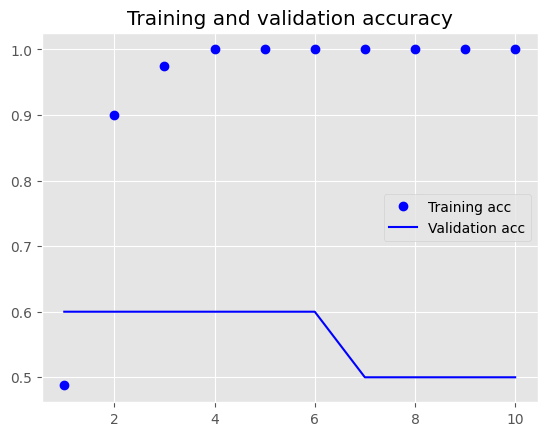

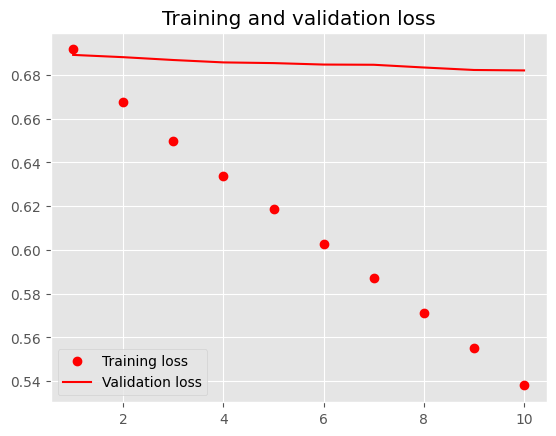

In [ ]:
import matplotlib.pyplot as plt

# Training accuracy
acc = history.history["acc"]
# Validation accuracy
validation_acc = history.history["val_acc"]
# Training loss
loss = history.history["loss"]
# Validation loss
validation_loss = history.history["val_loss"]

#plots every epoch, here 10
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, validation_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "ro", label = "Training loss")
plt.plot(epochs, validation_loss, "r", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()



In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 [==============================] - 1s 2ms/step - loss: 0.6940 - acc: 0.5007
Test loss: 0.6939836740493774
Test accuracy: 0.5006800293922424


The accuracy of the model was 0.5022 without limiting the training, validation, and test samples with an embedding layer.

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_14 (Flatten)        (None, 1200)              0         
                                                                 
 dense_18 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
13/13 [==============================] - 1s 30ms/step - loss: 0.6930 - acc: 0.5175 - val_loss: 0.6952 - val_acc: 0.4700
Epoch 2/10
13/13 [==============================] - 0s 9ms/step - loss: 0.6741 - acc: 0.8300 - val_loss: 0.6949 - val_acc: 0.4400
Epoch 3/10
13/13 [

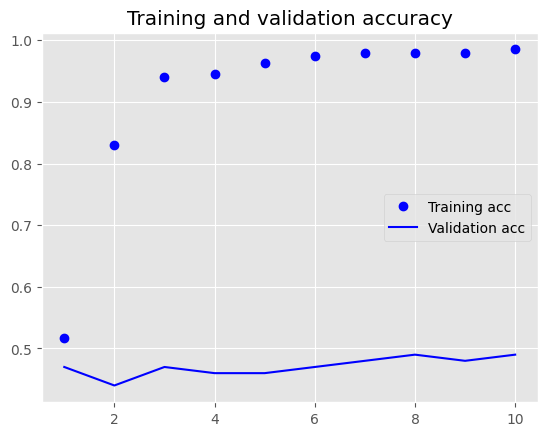

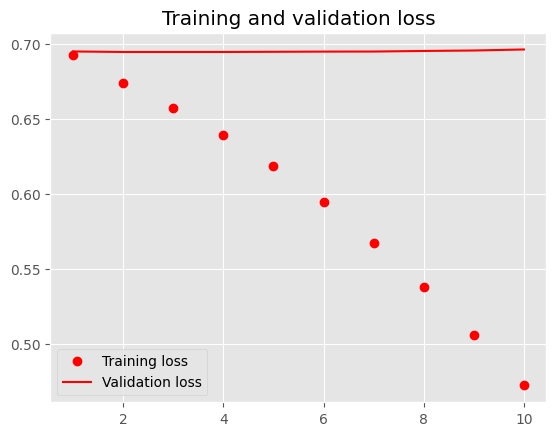

In [ ]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
Max_Features = 10000
# After this amount of words, cut the texts
# (among top max_features most common words)
Max_len = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=Max_Features)

x_train = x_train[:500]
y_train = y_train[:500]

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=Max_len)
x_test = pad_sequences(x_test, maxlen=Max_len)
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
# We provide our Embedding layer a maximum input length specification
# in order to flatten the embedded inputs later
model.add(Embedding(10000, 8, input_length=Max_len))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
acc = history.history["acc"] # Training accuracy
validation_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
valid_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, validation_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "ro", label = "Training loss")
plt.plot(epochs, valid_loss, "r", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.6909 - acc: 0.5262
Test loss: 0.6908859610557556
Test accuracy: 0.5262399911880493


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_15 (Flatten)        (None, 1200)              0         
                                                                 
 dense_19 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
25/25 [==============================] - 1s 16ms/step - loss: 0.6936 - acc: 0.4963 - val_loss: 0.6916 - val_acc: 0.5250
Epoch 2/10
25/25 [==============================] - 0s 6ms/step - loss: 0.6771 - acc: 0.7412 - val_loss: 0.6905 - val_acc: 0.5350
Epoch 3/10
25/25 [

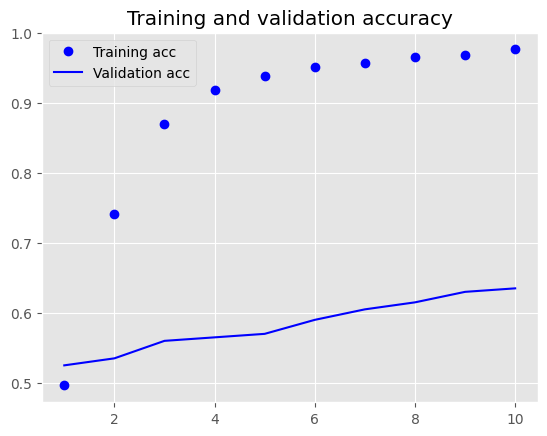

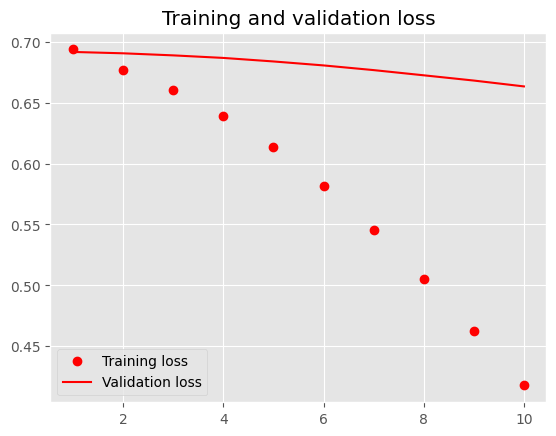

In [ ]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
Max_Features = 10000
# After this amount of words, cut the texts
# (among top max_features most common words)
Max_len = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=Max_Features)

x_train = x_train[:1000]
y_train = y_train[:1000]

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=Max_len)
x_test = pad_sequences(x_test, maxlen=Max_len)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We provide our Embedding layer a maximum input length specification
# in order to flatten the embedded inputs later
model.add(Embedding(10000, 8, input_length=Max_len))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())
# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
acc = history.history["acc"] # Training accuracy
validation_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
validation_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, validation_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "ro", label = "Training loss")
plt.plot(epochs, validation_loss, "r", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 [==============================] - 1s 2ms/step - loss: 0.6784 - acc: 0.5718
Test loss: 0.6784361004829407
Test accuracy: 0.5717599987983704


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_16 (Flatten)        (None, 1200)              0         
                                                                 
 dense_20 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
250/250 [==============================] - 1s 4ms/step - loss: 0.6886 - acc: 0.5589 - val_loss: 0.6725 - val_acc: 0.6795
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5915 - acc: 0.7939 - val_loss: 0.5229 - val_acc: 0.7975
Epoch 3/10
250/

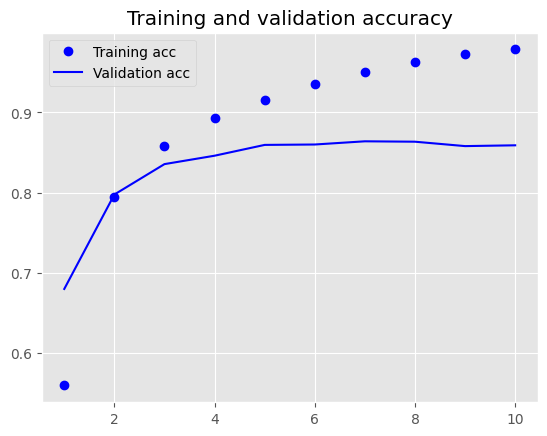

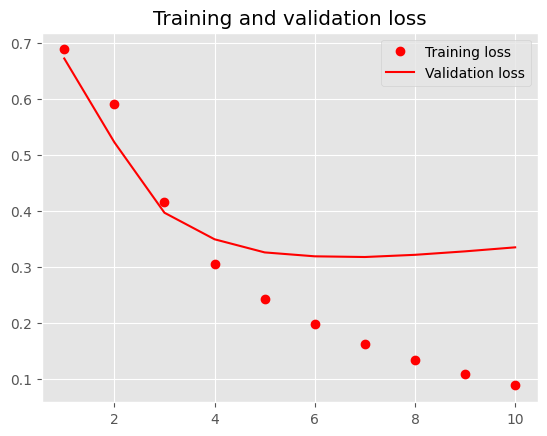

In [ ]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
Max_Features = 10000
# After this amount of words, cut the texts
# (among top max_features most common words)
max_len = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=Max_Features)

x_train = x_train[:10000]
y_train = y_train[:10000]

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=Max_len)
x_test = pad_sequences(x_test, maxlen=Max_len)
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
# We provide our Embedding layer a maximum input length specification
# in order to flatten the embedded inputs later
model.add(Embedding(10000, 8, input_length=max_len))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
acc = history.history["acc"] # Training accuracy
validation_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
validation_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10
plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, validation_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "ro", label = "Training loss")
plt.plot(epochs, validation_loss, "r", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.3379 - acc: 0.8573
Test loss: 0.33790692687034607
Test accuracy: 0.8573200106620789


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 [==============================] - 2s 3ms/step - loss: 0.3379 - acc: 0.8573
Test loss: 0.33790692687034607
Test accuracy: 0.8573200106620789


In [ ]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  32.1M      0  0:00:02  0:00:02 --:--:-- 32.1M


In [ ]:
import os
import shutil

imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

If there isn't sufficient training data to learn word embeddings alongside the specific problem you're addressing, you can utilize pre-existing word embeddings instead.

The reviews are gathered into a list of strings, with one string representing each review, and the corresponding labels (positive/negative) are collected into another list.

**Tokenizing the data(it involves splitting the data into smaller units called tokens)**

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

Max_len = 150 # cuts off review after 150 words
training_samples = 100 # Trains on 100 samples
validation_samples = 10000 # Validates 10000 samples
Max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=Max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index    # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=Max_len)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # Splits data into training and validation set, but shuffles is, since samples are ordered:
# all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


**Downloading and Preprocessing the GloVe word embedding**

In [ ]:
import numpy as np
import requests
from io import BytesIO
import zipfile  # importing zipfile module

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


Next, we need to create an embedding matrix suitable for an embedding layer. It should have dimensions of (max words, embedding dimension), which in this case is 10000 x 100. The GloVe embedding is originally sized at 100 x 400000.

**Preparing the GloVe word embeddings matrix**

In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((Max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < Max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(Max_words, embedding_dim, input_length=Max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_17 (Flatten)        (None, 15000)             0         
                                                                 
 dense_21 (Dense)            (None, 32)                480032    
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

By setting this to False, the Embedding layer won't be trainable, meaning the optimization algorithm won't modify the word embedding values. Conversely, setting it to True allows the algorithm to update the pretrained embeddings. It's generally advised not to update pretrained embeddings during training to avoid them forgetting what they've already learned.








In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
4/4 [==============================] - 1s 287ms/step - loss: 2.9783 - acc: 0.5000 - val_loss: 1.3724 - val_acc: 0.5034
Epoch 2/10
4/4 [==============================] - 1s 436ms/step - loss: 1.1115 - acc: 0.5700 - val_loss: 0.7545 - val_acc: 0.5290
Epoch 3/10
4/4 [==============================] - 1s 435ms/step - loss: 0.2328 - acc: 0.9300 - val_loss: 0.8235 - val_acc: 0.5148
Epoch 4/10
4/4 [==============================] - 1s 445ms/step - loss: 0.1844 - acc: 0.9400 - val_loss: 0.7466 - val_acc: 0.5310
Epoch 5/10
4/4 [==============================] - 1s 444ms/step - loss: 0.1009 - acc: 1.0000 - val_loss: 0.7193 - val_acc: 0.5417
Epoch 6/10
4/4 [==============================] - 1s 445ms/step - loss: 0.0572 - acc: 1.0000 - val_loss: 0.8718 - val_acc: 0.5114
Epoch 7/10
4/4 [==============================] - 1s 392ms/step - loss: 0.0579 - acc: 1.0000 - val_loss: 0.7339 - val_acc: 0.5504
Epoch 8/10
4/4 [==============================] - 1s 399ms/step - loss: 0.0250 - acc: 1.00

As expected with a small training dataset, the model starts overfitting quickly. The wide range of validation accuracy results is also due to this limited amount of data.

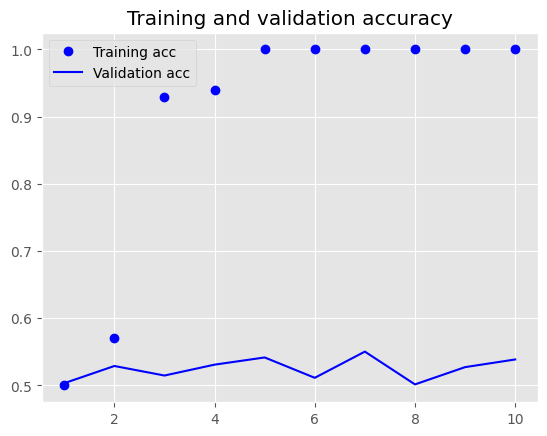

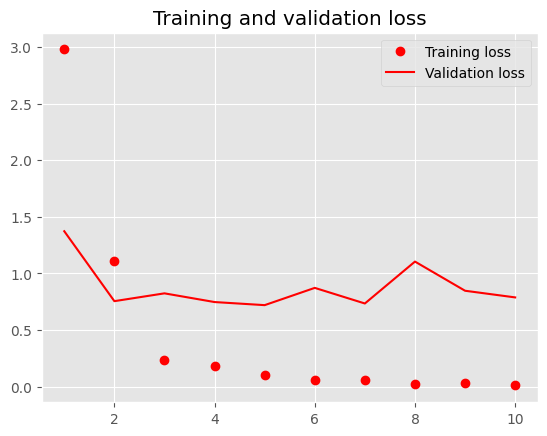

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
validation_acc = history.history['val_acc']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, validation_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, validation_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 [==============================] - 3s 4ms/step - loss: 0.8545 - acc: 0.5014
Test loss: 0.8545264005661011
Test accuracy: 0.5013599991798401


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_18 (Flatten)        (None, 15000)             0         
                                                                 
 dense_23 (Dense)            (None, 32)                480032    
                                                                 
 dense_24 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
16/16 [==============================] - 2

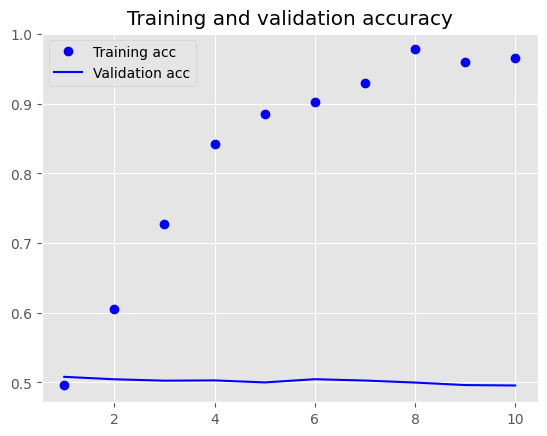

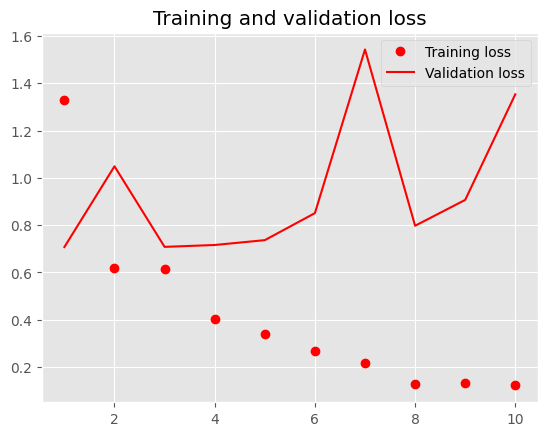

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

Max_len = 150 # cuts off review after 150 words
training_samples = 500 # Trains on 500 samples
validation_samples = 10000 # Validates 10000 samples
Max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=Max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index    # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=Max_len)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # splits data into training and validation sets,
# however since the samples are arranged, it shuffles the data: all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)
embedding_dim = 100
embedding_matrix = np.zeros((Max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < Max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(Max_words, embedding_dim, input_length=Max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')
import matplotlib.pyplot as plt
acc = history.history['acc']
validation_acc = history.history['val_acc']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, validation_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, validation_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 [==============================] - 2s 3ms/step - loss: 1.3406 - acc: 0.4992
Test loss: 1.3405719995498657
Test accuracy: 0.4991999864578247


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_32 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_19 (Flatten)        (None, 15000)             0         
                                                                 
 dense_25 (Dense)            (None, 32)                480032    
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
32/32 [==============================] - 3

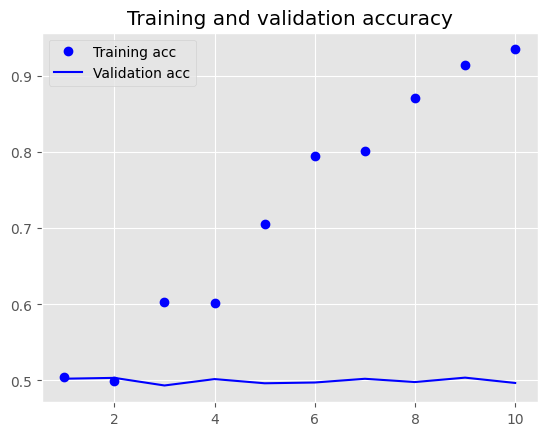

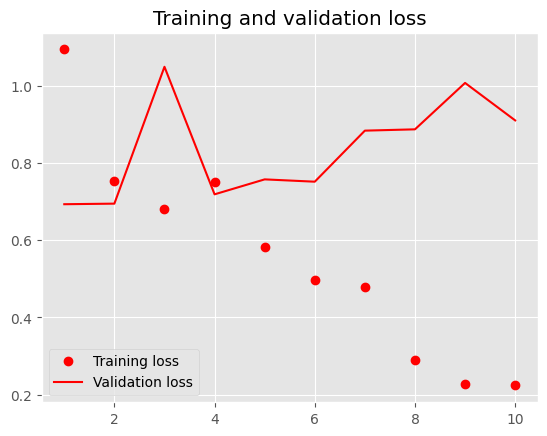

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

Max_len = 150 # cuts off review after 150 words
training_samples = 1000 #Trains on 1000 samples
validation_samples = 10000 # Validates o 10000 samples
Max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=Max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index      # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=Max_len)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # splits data into training and validation sets,
# however since the samples are arranged, it shuffles the data: all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)
embedding_dim = 100

embedding_matrix = np.zeros((Max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < Max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(Max_words, embedding_dim, input_length=Max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')
import matplotlib.pyplot as plt

acc = history.history['acc']
validation_acc = history.history['val_acc']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, validation_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, validation_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 [==============================] - 3s 3ms/step - loss: 0.9096 - acc: 0.4955
Test loss: 0.9096434116363525
Test accuracy: 0.4954800009727478


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_33 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_20 (Flatten)        (None, 15000)             0         
                                                                 
 dense_27 (Dense)            (None, 32)                480032    
                                                                 
 dense_28 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
313/313 [==============================] -

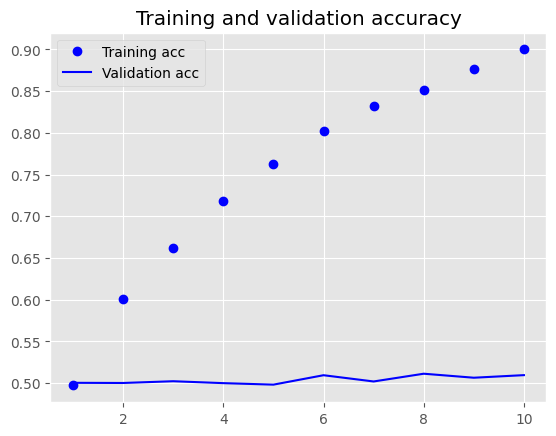

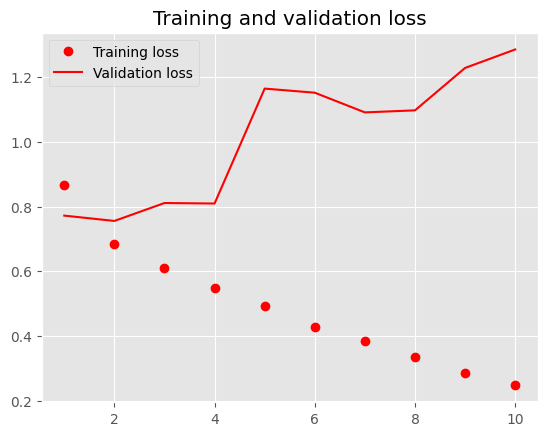

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

Max_len = 150 # cuts off review after 150 words
training_samples = 10000 # Trains on 10000 samples
validation_samples = 10000 # Validates o 10000 samples
Max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=Max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index       # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=Max_len)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # splits data into training and validation sets,
# however since the samples are arranged, it shuffles the data: all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)
embedding_dim = 100

embedding_matrix = np.zeros((Max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < Max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(Max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')
import matplotlib.pyplot as plt

acc = history.history['acc']
validation_acc = history.history['val_acc']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, validation_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, validation_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 [==============================] - 3s 4ms/step - loss: 1.3040 - acc: 0.4990
Test loss: 1.3039577007293701
Test accuracy: 0.49904000759124756
